# Predicting Australia's vehicle price using ML with python

# import libraries

In [1]:
import pandas as pd
import numpy as np 
import sklearn
from scipy import stats
import seaborn as sns
from scipy.stats import normaltest
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import jarque_bera
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
path="C:/Users/mojde/OneDrive/Desktop/python project xi/project 3/car price australia/Australian Vehicle Prices.csv"
df1=pd.read_csv(path)


In [3]:
df1.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [4]:
df1.shape

(16734, 19)

In [5]:
df1['Transmission'].unique()

array(['Automatic', 'Manual', '-', nan], dtype=object)

In [6]:
df1.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')

# Data preparation

In [7]:
#remove unnecessary columns 

df1.drop(['Year','Title','Brand','Model','Car/Suv','ColourExtInt','Location','ColourExtInt','Engine'], axis=1, inplace=True)

In [8]:
#find percentage of any  NA rows
df1.isna().sum()/len(df1)*100


UsedOrNew             0.005976
Transmission          0.005976
DriveType             0.005976
FuelType              0.005976
FuelConsumption       0.005976
Kilometres            0.005976
CylindersinEngine     0.005976
BodyType              1.685192
Doors                 9.585275
Seats                10.188837
Price                 0.017928
dtype: float64

In [9]:
#remove NA rows 
df1=df1.dropna()
df1.shape

(15028, 11)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15028 entries, 0 to 16733
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UsedOrNew          15028 non-null  object
 1   Transmission       15028 non-null  object
 2   DriveType          15028 non-null  object
 3   FuelType           15028 non-null  object
 4   FuelConsumption    15028 non-null  object
 5   Kilometres         15028 non-null  object
 6   CylindersinEngine  15028 non-null  object
 7   BodyType           15028 non-null  object
 8   Doors              15028 non-null  object
 9   Seats              15028 non-null  object
 10  Price              15028 non-null  object
dtypes: object(11)
memory usage: 1.4+ MB


In [11]:
df1.head()

,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price
0,DEMO,Automatic,AWD,Diesel,8.7 L / 100 km,5595,4 cyl,SUV,4 Doors,7 Seats,51990
1,USED,Automatic,Front,Premium,6.7 L / 100 km,16,4 cyl,Hatchback,5 Doors,5 Seats,19990
2,USED,Automatic,Rear,Premium,6.6 L / 100 km,8472,4 cyl,Coupe,2 Doors,4 Seats,108988
3,USED,Automatic,Rear,Premium,11 L / 100 km,136517,8 cyl,Coupe,2 Doors,4 Seats,32990
4,USED,Automatic,Front,Unleaded,6 L / 100 km,1035,4 cyl,SUV,4 Doors,5 Seats,34990


In [12]:
#remove cyl and doors and seats in columns: CylindersinEngine,Doors,Seats  and change the type from object to int
#df1.loc[:,'CylindersinEngine']=df1['CylindersinEngine'].str.replace(r'cyl', '', regex=True).astype(int)
#df1.loc[:,'Doors']=df1['Doors'].str.replace(r'Doors',"",regex=True).astype(int)
#df1.loc[:,'Seats']=df1['Seats'].str.replace(r'Seats',"",regex=True).astype(int)
#df1.head()

In [13]:
#remove non numerical text such as 'cyl','seats','doors'for each cell from : CylindersinEngine,Doors,Seats  and change the type from object to int
df1['CylindersinEngine'] = df1['CylindersinEngine'].str.replace(r'\D+', '', regex=True).astype(int)
df1['FuelConsumption'] = df1['FuelConsumption'].str.replace(r'\D+', '', regex=True).astype(int)
df1['Doors'] = df1['Doors'].str.replace(r'\D+', '', regex=True).astype(int)
df1['Seats'] = df1['Seats'].str.replace(r'\D+', '', regex=True).astype(int)


In [14]:
df1 = df1[~df1['FuelType'].str.contains('-')]

In [15]:
df1= df1[~df1['Transmission'].str.contains('-')]

In [16]:
df1['FuelConsumption'] = df1['FuelConsumption'].astype(str).str[:-2].astype(int)

In [17]:
df1.rename(columns={'FuelConsumption': 'FuelConsumptionPer100Km'}, inplace=True)

In [18]:
#remove non numerical value from Price column
df1 = df1[pd.to_numeric(df1['Price'], errors='coerce').notna()]
df1['Price']=df1['Price'].astype(int)



In [19]:
#change Kilometer type to int 
df1['Kilometres'] = pd.to_numeric(df1['Kilometres'], errors='coerce')
df1['Kilometres'] = df1['Kilometres'].fillna(0)
df1['Kilometres'] = df1['Kilometres'].astype(int)


In [20]:
df1.head()

,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumptionPer100Km,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price
0,DEMO,Automatic,AWD,Diesel,871,5595,4,SUV,4,7,51990
1,USED,Automatic,Front,Premium,671,16,4,Hatchback,5,5,19990
2,USED,Automatic,Rear,Premium,661,8472,4,Coupe,2,4,108988
3,USED,Automatic,Rear,Premium,111,136517,8,Coupe,2,4,32990
4,USED,Automatic,Front,Unleaded,61,1035,4,SUV,4,5,34990


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14746 entries, 0 to 16733
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   UsedOrNew                14746 non-null  object
 1   Transmission             14746 non-null  object
 2   DriveType                14746 non-null  object
 3   FuelType                 14746 non-null  object
 4   FuelConsumptionPer100Km  14746 non-null  int32 
 5   Kilometres               14746 non-null  int32 
 6   CylindersinEngine        14746 non-null  int32 
 7   BodyType                 14746 non-null  object
 8   Doors                    14746 non-null  int32 
 9   Seats                    14746 non-null  int32 
 10  Price                    14746 non-null  int32 
dtypes: int32(6), object(5)
memory usage: 1.0+ MB


In [22]:
df1.shape

(14746, 11)

In [23]:
#finding ay duplication
repeated=df1.duplicated().sum()
repeated

39

In [24]:
#remove duplications 
df1.drop_duplicates(inplace=True)
df1.shape

(14707, 11)

In [25]:
df1.columns

Index(['UsedOrNew', 'Transmission', 'DriveType', 'FuelType',
       'FuelConsumptionPer100Km', 'Kilometres', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')

In [26]:
df1.dtypes

UsedOrNew                  object
Transmission               object
DriveType                  object
FuelType                   object
FuelConsumptionPer100Km     int32
Kilometres                  int32
CylindersinEngine           int32
BodyType                   object
Doors                       int32
Seats                       int32
Price                       int32
dtype: object

In [27]:
numeric_cols = ['FuelConsumptionPer100Km', 'Kilometres', 'CylindersinEngine', 'Doors', 'Seats','Price']
df_numeric = df1[numeric_cols]
X = df_numeric.drop(columns=['Price'])  # Features
y = df_numeric['Price']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     1679.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:36:38   Log-Likelihood:            -1.7109e+05
No. Observations:               14707   AIC:                         3.422e+05
Df Residuals:                   14701   BIC:                         3.422e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

# checking linearity assumption of variables 

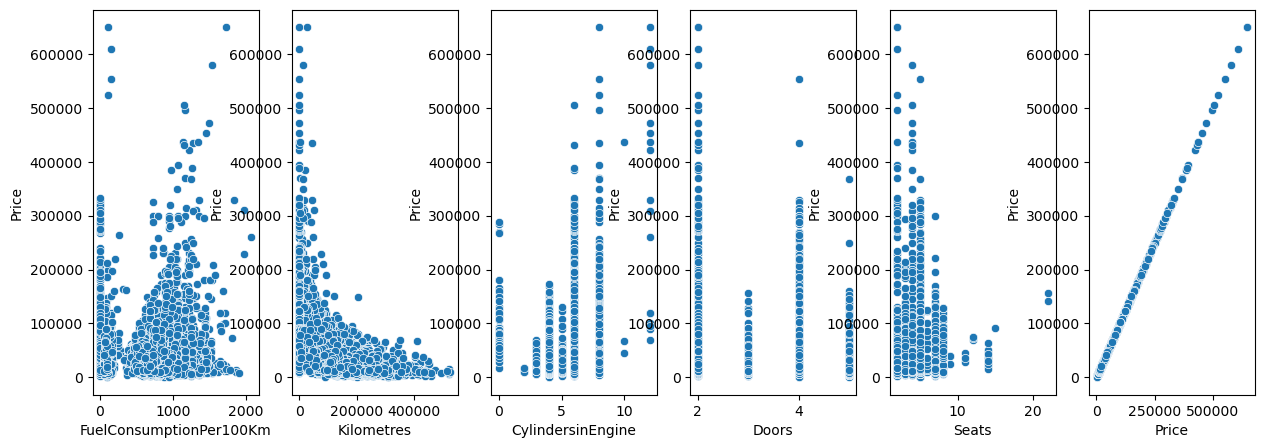

In [28]:
plt.figure(figsize=(15,5))
for i, feature in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.scatterplot(x=feature, y='Price', data=df1)
    plt.xlabel(feature)
    plt.ylabel('Price')

# Identify categorical variables


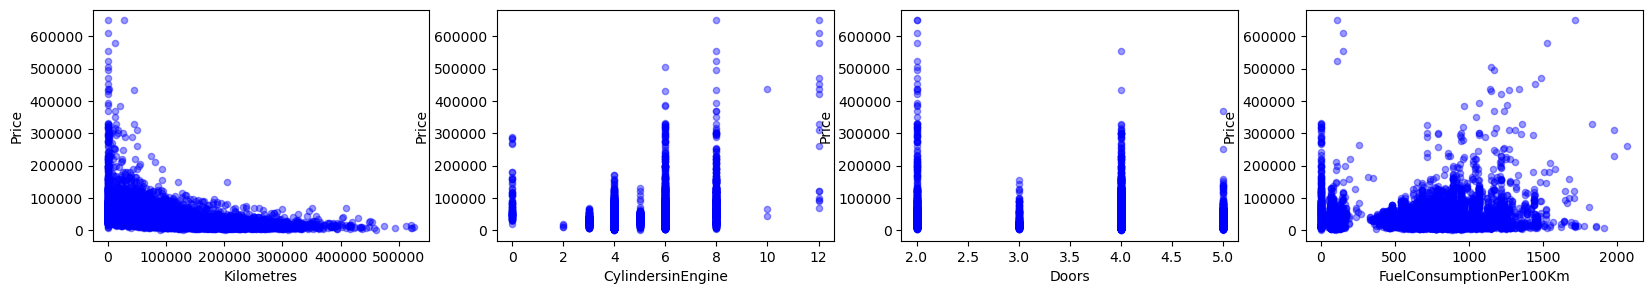

In [29]:
%matplotlib inline
fig,axes=plt.subplots(nrows=1,ncols=4,figsize=(20,3))
for xcol,ax in zip(['Kilometres','CylindersinEngine','Doors','FuelConsumptionPer100Km'],axes):
    df1.plot(kind='scatter',x=xcol,y="Price",ax=ax,alpha=0.4,color='b')

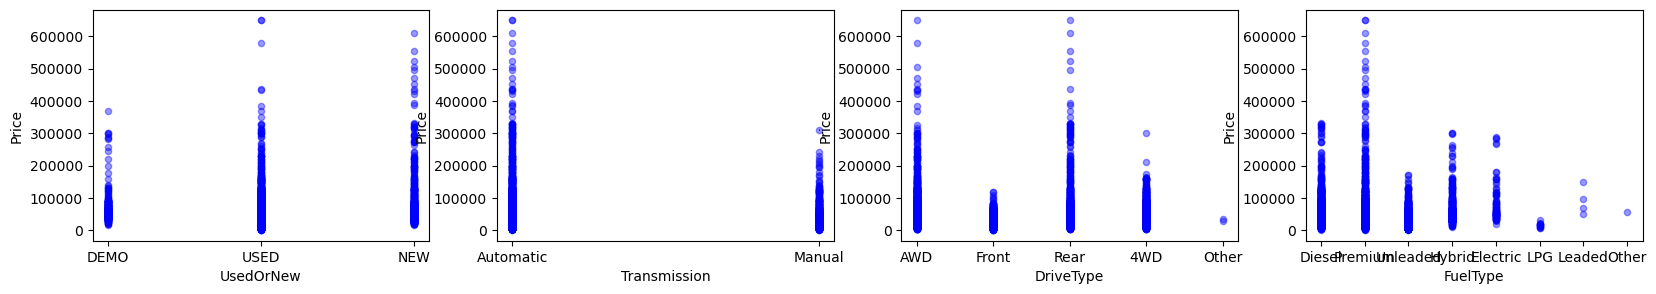

In [30]:
fig,axes=plt.subplots(nrows=1,ncols=4,figsize=(20,3))
for xcol,ax in zip(['UsedOrNew','Transmission','DriveType','FuelType'],axes):
    df1.plot(kind='scatter',x=xcol,y="Price",ax=ax,alpha=0.4,color='b')

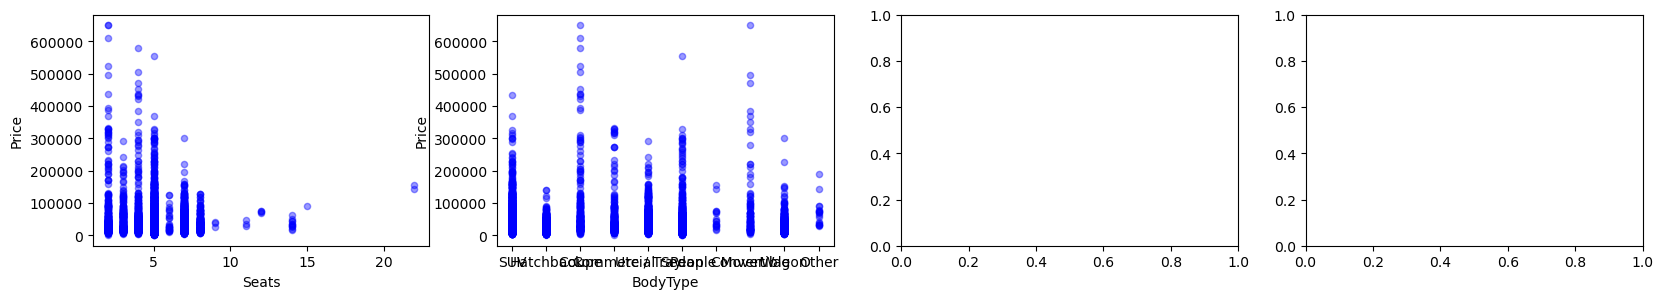

In [31]:
fig,axes=plt.subplots(nrows=1,ncols=4,figsize=(20,3))
for xcol,ax in zip(['Seats','BodyType'],axes):
    df1.plot(kind='scatter',x=xcol,y="Price",ax=ax,alpha=0.4,color='b')

In [32]:
#categorical variables are :CylindersinEngine,Doors,UsedOrNew,Transmission,DriveType,FuelType,Seats,BodyType

In [33]:
#checking how many unique value do we have of each column
for column in df1.columns:
    
    number=df1[column].nunique()
    print(column+ ':'+ str(number))

UsedOrNew:3
Transmission:2
DriveType:5
FuelType:8
FuelConsumptionPer100Km:152
Kilometres:12917
CylindersinEngine:9
BodyType:10
Doors:4
Seats:13
Price:3471


In [34]:
df1.describe()

,FuelConsumptionPer100Km,Kilometres,CylindersinEngine,Doors,Seats,Price
count,14707.000000,14707.000000,14707.000000,14707.000000,14707.000000,14707.000000
mean,689.958319,98250.625620,4.431699,4.001564,5.102400,36623.794656
std,303.308140,78629.950461,1.121121,0.692137,1.126012,34213.764243
min,1.000000,0.000000,0.000000,2.000000,2.000000,88.000000
25%,591.000000,38040.000000,4.000000,4.000000,5.000000,18990.000000
50%,741.000000,83285.000000,4.000000,4.000000,5.000000,28990.000000
75%,851.000000,145192.500000,4.000000,4.000000,5.000000,43880.000000
max,2071.000000,526162.000000,12.000000,5.000000,22.000000,649880.000000


In [35]:
df1.columns

Index(['UsedOrNew', 'Transmission', 'DriveType', 'FuelType',
       'FuelConsumptionPer100Km', 'Kilometres', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')

# Detecting Outliers Using IQR 

In [36]:
q1=df1['Kilometres'].quantile(0.25)
q3=df1['Kilometres'].quantile(0.75)
IQR1=q3-q1
upper_limit_Kilometres=q3+(1.5*IQR1)
lower_limit_Kilometres=q1-(1.5*IQR1)
lower_limit_Kilometres,upper_limit_Kilometres

(-122688.75, 305921.25)

In [37]:
q1=df1['FuelConsumptionPer100Km'].quantile(0.25)
q3=df1['FuelConsumptionPer100Km'].quantile(0.75)
IQR1=q3-q1
upper_limit_FuelConsumptionPer100Km=q3+(1.5*IQR1)
lower_limit_FuelConsumptionPer100Km=q1-(1.5*IQR1)
lower_limit_FuelConsumptionPer100Km,upper_limit_FuelConsumptionPer100Km

(201.0, 1241.0)

In [38]:
#q1=df1['Year'].quantile(0.25)
#q3=df1['Year'].quantile(0.75)
#IQR1=q3-q1
#upper_limit_Year=q3+(1.5*IQR1)
#lower_limit_Year=q1-(1.5*IQR1)
#lower_limit_Year,upper_limit_Year

In [39]:
#we only have outliers for kilometres and year so we will remove outliers for these two variables

<Axes: xlabel='FuelConsumptionPer100Km'>

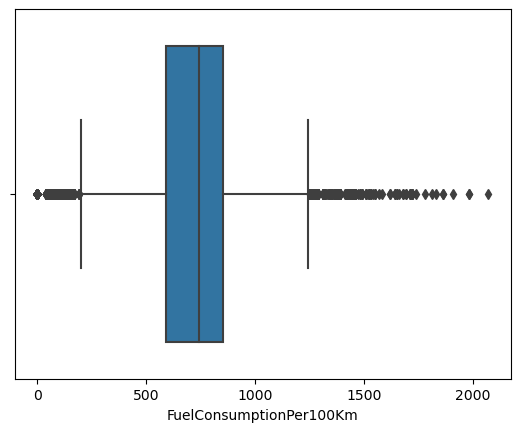

In [40]:
sns.boxplot(x='FuelConsumptionPer100Km',data=df1)

# Removing Outliers 

In [41]:
df2=df1.loc[(df1['Kilometres']<upper_limit_Kilometres) & (df1['Kilometres'] > lower_limit_Kilometres)]
print('before removing outliers',len(df1))
print('after removing outliers',len(df2))
print('number of outliers',len(df1)-len(df2))


before removing outliers 14707
after removing outliers 14474
number of outliers 233


In [42]:
df3=df2.loc[(df2['FuelConsumptionPer100Km']<upper_limit_Kilometres) & (df2['FuelConsumptionPer100Km'] > lower_limit_Kilometres)]
print('before removing outliers',len(df2))
print('after removing outliers',len(df3))
print('number of outliers',len(df2)-len(df3))

before removing outliers 14474
after removing outliers 14474
number of outliers 0


In [43]:
#df3=df2.loc[(df2['Year']<upper_limit_Year) & (df2['Year'] > lower_limit_Year)]
#print('before removing outliers',len(df2))
#print('after removing outliers',len(df3))
#print('number of outliers',len(df2)-len(df3))


In [44]:
#check dataframe before grouping
df3.head(10)

,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumptionPer100Km,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price
0,DEMO,Automatic,AWD,Diesel,871,5595,4,SUV,4,7,51990
1,USED,Automatic,Front,Premium,671,16,4,Hatchback,5,5,19990
2,USED,Automatic,Rear,Premium,661,8472,4,Coupe,2,4,108988
3,USED,Automatic,Rear,Premium,111,136517,8,Coupe,2,4,32990
4,USED,Automatic,Front,Unleaded,61,1035,4,SUV,4,5,34990
6,USED,Automatic,AWD,Diesel,511,67662,4,SUV,2,4,62280
7,USED,Automatic,Front,Unleaded,81,300539,4,Hatchback,5,5,2995
8,USED,Automatic,Rear,Premium,711,82012,4,Coupe,2,4,24888
9,USED,Automatic,Front,Hybrid,451,38229,4,Hatchback,5,5,17900
11,USED,Automatic,Rear,Unleaded,981,16324,4,Commercial,4,2,41999


# Grouping categorical variables

In [45]:
#we grouping categorical variables in which the unique value is like more than 6 ,then we create dummies based on this grouped one
df3['FuelType'].unique()

array(['Diesel', 'Premium', 'Unleaded', 'Hybrid', 'Electric', 'LPG',
       'Leaded', 'Other'], dtype=object)

In [46]:
mapping = {'Diesel': 'Oil', 'Premium': 'Oil', 'Unleaded': 'Oil', 'LPG': 'Gas', 'Hybrid': 'Electric', 'Electric': 'Electric','Leaded':'Oil'}
df3.loc[:,'FuelType'] = df3['FuelType'].replace(mapping).fillna('Other')


In [47]:
set(df3['CylindersinEngine'].unique())

{0, 2, 3, 4, 5, 6, 8, 10, 12}

In [48]:
df3.loc[:,'CylindersinEngine'] = pd.to_numeric(df3['CylindersinEngine'], errors='coerce')
df3.loc[:,'CylindersinEngine'] = pd.cut(df3['CylindersinEngine'], bins=[0,4,8,12], labels=['L','M','H'], right=False)

In [49]:
df3['BodyType'].unique()

array(['SUV', 'Hatchback', 'Coupe', 'Commercial', 'Ute / Tray', 'Sedan',
       'People Mover', 'Convertible', 'Wagon', 'Other'], dtype=object)

In [50]:
mapping = {
    'SUV': 'SUV',
    'Hatchback': 'Sedan',
    'Coupe': 'Sedan',
    'Commercial': 'Truck',
    'Ute / Tray': 'Truck',
    'Sedan': 'Sedan',
    'People Mover': 'SUV',
    'Convertible': 'Sedan',
    'Wagon': 'Sedan',
    'Other': 'Other'
}



In [51]:
df3.loc[:,'BodyType'] = df3['BodyType'].replace(mapping).fillna('Other')

In [52]:
set(df3['Seats'].unique())

{2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 22}

In [53]:
df3.loc[:,'Seats'] = pd.cut(df3['Seats'], bins=[0,4,7,11,22], labels=["Small","Medium","Large","Van"], right=False)

In [54]:
df3.columns

Index(['UsedOrNew', 'Transmission', 'DriveType', 'FuelType',
       'FuelConsumptionPer100Km', 'Kilometres', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')

In [55]:
df3['UsedOrNew'].unique()

array(['DEMO', 'USED', 'NEW'], dtype=object)

In [56]:
#check dataframe after grouping
df3.head()

,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumptionPer100Km,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price
0,DEMO,Automatic,AWD,Oil,871,5595,M,SUV,4,Large,51990
1,USED,Automatic,Front,Oil,671,16,M,Sedan,5,Medium,19990
2,USED,Automatic,Rear,Oil,661,8472,M,Sedan,2,Medium,108988
3,USED,Automatic,Rear,Oil,111,136517,H,Sedan,2,Medium,32990
4,USED,Automatic,Front,Oil,61,1035,M,SUV,4,Medium,34990


# Creating Dummies for Ctegorical Variables

In [57]:
UsedOrNew_dummies=pd.get_dummies(df3["UsedOrNew"],prefix='UN',drop_first=True)
Transmission_dummies=pd.get_dummies(df3["Transmission"],prefix='Tran',drop_first=True)
DriveType_dummies=pd.get_dummies(df3["DriveType"],prefix='Drive',drop_first=True)
FuelType_dummies=pd.get_dummies(df3["FuelType"],prefix='Fuel',drop_first=True)
CylindersinEngine_dummies=pd.get_dummies(df3["CylindersinEngine"],prefix='Cyl',drop_first=True)
BodyType_dummies=pd.get_dummies(df3["BodyType"],prefix='Body',drop_first=True)
Doors_dummies=pd.get_dummies(df3["Doors"],prefix='Door',drop_first=True)
Seats_dummies=pd.get_dummies(df3["Seats"],prefix='Seat',drop_first=True)


In [58]:
#drop the original column
df3=df3.drop(['UsedOrNew','Transmission','DriveType','FuelType','CylindersinEngine','BodyType','Doors','Seats'],axis=1)

In [59]:
#concatinate two previous code

df4=pd.concat([df3,UsedOrNew_dummies,Transmission_dummies,DriveType_dummies,
               FuelType_dummies,CylindersinEngine_dummies,BodyType_dummies,
              Doors_dummies,Seats_dummies],axis=1)
df4.head()

,FuelConsumptionPer100Km,Kilometres,Price,UN_NEW,UN_USED,Tran_Manual,Drive_AWD,Drive_Front,Drive_Other,Drive_Rear,...,Cyl_H,Body_SUV,Body_Sedan,Body_Truck,Door_3,Door_4,Door_5,Seat_Medium,Seat_Large,Seat_Van
0,871,5595,51990,False,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
1,671,16,19990,False,True,False,False,True,False,False,...,False,False,True,False,False,False,True,True,False,False
2,661,8472,108988,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
3,111,136517,32990,False,True,False,False,False,False,True,...,True,False,True,False,False,False,False,True,False,False
4,61,1035,34990,False,True,False,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False


In [60]:
df4.columns

Index(['FuelConsumptionPer100Km', 'Kilometres', 'Price', 'UN_NEW', 'UN_USED',
       'Tran_Manual', 'Drive_AWD', 'Drive_Front', 'Drive_Other', 'Drive_Rear',
       'Fuel_Gas', 'Fuel_Oil', 'Fuel_Other', 'Cyl_M', 'Cyl_H', 'Body_SUV',
       'Body_Sedan', 'Body_Truck', 'Door_3', 'Door_4', 'Door_5', 'Seat_Medium',
       'Seat_Large', 'Seat_Van'],
      dtype='object')

In [61]:
#change dummies column to int 
df4 = df4.astype(int)
df4.head()

,FuelConsumptionPer100Km,Kilometres,Price,UN_NEW,UN_USED,Tran_Manual,Drive_AWD,Drive_Front,Drive_Other,Drive_Rear,...,Cyl_H,Body_SUV,Body_Sedan,Body_Truck,Door_3,Door_4,Door_5,Seat_Medium,Seat_Large,Seat_Van
0,871,5595,51990,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,671,16,19990,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
2,661,8472,108988,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,111,136517,32990,0,1,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
4,61,1035,34990,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [62]:
df4.columns

Index(['FuelConsumptionPer100Km', 'Kilometres', 'Price', 'UN_NEW', 'UN_USED',
       'Tran_Manual', 'Drive_AWD', 'Drive_Front', 'Drive_Other', 'Drive_Rear',
       'Fuel_Gas', 'Fuel_Oil', 'Fuel_Other', 'Cyl_M', 'Cyl_H', 'Body_SUV',
       'Body_Sedan', 'Body_Truck', 'Door_3', 'Door_4', 'Door_5', 'Seat_Medium',
       'Seat_Large', 'Seat_Van'],
      dtype='object')

# Checking Multicollinearity:

In [63]:
df5=df4.drop('Price',axis=1)
df5.head()

,FuelConsumptionPer100Km,Kilometres,UN_NEW,UN_USED,Tran_Manual,Drive_AWD,Drive_Front,Drive_Other,Drive_Rear,Fuel_Gas,...,Cyl_H,Body_SUV,Body_Sedan,Body_Truck,Door_3,Door_4,Door_5,Seat_Medium,Seat_Large,Seat_Van
0,871,5595,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,671,16,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,661,8472,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,111,136517,0,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
4,61,1035,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [64]:
df5.corr()

,FuelConsumptionPer100Km,Kilometres,UN_NEW,UN_USED,Tran_Manual,Drive_AWD,Drive_Front,Drive_Other,Drive_Rear,Fuel_Gas,...,Cyl_H,Body_SUV,Body_Sedan,Body_Truck,Door_3,Door_4,Door_5,Seat_Medium,Seat_Large,Seat_Van
FuelConsumptionPer100Km,1.000000,0.158254,-0.094018,0.095807,0.044608,0.044660,-0.158066,-0.004275,0.079924,0.059109,...,0.238720,0.011004,-0.043819,0.045804,-0.066856,0.147779,-0.171829,-0.038776,0.059098,-0.018398
Kilometres,0.158254,1.000000,-0.326411,0.397933,0.196968,-0.096581,-0.157694,-0.000141,0.125814,0.035091,...,0.014100,-0.121718,0.006408,0.153859,-0.006800,0.061013,-0.091501,-0.079861,0.044656,0.019582
UN_NEW,-0.094018,-0.326411,1.000000,-0.816513,-0.014580,0.022589,-0.030587,-0.002938,0.027240,-0.007494,...,-0.023165,0.021918,-0.098935,0.090433,0.039396,-0.027030,-0.040720,-0.063216,-0.013365,0.017154
UN_USED,0.095807,0.397933,-0.816513,1.000000,0.042995,-0.056215,0.021305,0.003598,0.009764,0.009178,...,0.032979,-0.066547,0.115004,-0.053959,-0.021574,-0.011545,0.054229,0.042028,0.008955,-0.011125
Tran_Manual,0.044608,0.196968,-0.014580,0.042995,1.000000,-0.110353,-0.052126,0.014190,0.090094,-0.010806,...,0.078336,-0.225375,0.024050,0.261849,0.081039,-0.193590,0.030574,-0.035332,-0.122027,0.006612
Drive_AWD,0.044660,-0.096581,0.022589,-0.056215,-0.110353,1.000000,-0.458607,-0.006020,-0.208130,-0.015354,...,-0.008763,0.388913,-0.221961,-0.226079,-0.039965,0.141933,-0.079579,-0.013004,0.100685,-0.017560
Drive_Front,-0.158066,-0.157694,-0.030587,0.021305,-0.052126,-0.458607,1.000000,-0.010528,-0.363992,-0.026852,...,-0.184289,-0.108794,0.396837,-0.359326,0.077833,-0.216299,0.358210,0.182131,-0.101855,-0.030710
Drive_Other,-0.004275,-0.000141,-0.002938,0.003598,0.014190,-0.006020,-0.010528,1.000000,-0.004778,-0.000352,...,-0.002419,-0.010632,0.015307,-0.005466,-0.001413,-0.020042,-0.005279,0.005836,-0.004661,-0.000403
Drive_Rear,0.079924,0.125814,0.027240,0.009764,0.090094,-0.208130,-0.363992,-0.004778,1.000000,0.073770,...,0.206315,-0.303070,0.142967,0.211490,0.006346,-0.102453,-0.155486,-0.151800,-0.106792,0.067022
Fuel_Gas,0.059109,0.035091,-0.007494,0.009178,-0.010806,-0.015354,-0.026852,-0.000352,0.073770,1.000000,...,-0.006170,-0.027116,0.015167,0.016222,-0.003603,-0.008838,-0.013464,-0.014068,-0.011887,-0.001028


In [65]:
#checking for high correlation
abs(df5.corr())>0.75

,FuelConsumptionPer100Km,Kilometres,UN_NEW,UN_USED,Tran_Manual,Drive_AWD,Drive_Front,Drive_Other,Drive_Rear,Fuel_Gas,...,Cyl_H,Body_SUV,Body_Sedan,Body_Truck,Door_3,Door_4,Door_5,Seat_Medium,Seat_Large,Seat_Van
FuelConsumptionPer100Km,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Kilometres,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
UN_NEW,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
UN_USED,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Tran_Manual,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Drive_AWD,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Drive_Front,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Drive_Other,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Drive_Rear,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Fuel_Gas,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [66]:
#get pairs of highly correlated variables
df6=df5.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df6['pairs'] = list(zip(df6.level_0, df6.level_1))
df6.set_index(['pairs'], inplace = True)
df6.drop(columns=['level_1', 'level_0'], inplace = True)
df6.columns = ['cc']
df6.drop_duplicates(inplace=True)
df6[(df6.cc>.75) & (df6.cc <1)]

,cc
pairs,
"(UN_NEW, UN_USED)",0.816513
"(Seat_Medium, Seat_Large)",0.798576
"(Door_4, Door_5)",0.765604
"(Cyl_H, Cyl_M)",0.756570


In [67]:
#since all pairs are dummies so we dont remove any columns as we will see the positive effect on our R_square in our model without removing any dummies which we see from multicollinearity
#if any of the pairs were continious variable so would be able to remove one from each pairs in favour of improving our model
#we also can remove non significant dummies variable based on our model at this stage only Seat_Large is not significant(p>0.05) that we will remove it
#df4.drop('Seat_Large', axis=1, inplace=True)

In [68]:
df4.dropna(inplace=True)
X = sm.add_constant(df4.drop(columns=['Price']))
y = df4['Price']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     489.9
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:36:41   Log-Likelihood:            -1.6754e+05
No. Observations:               14474   AIC:                         3.351e+05
Df Residuals:                   14450   BIC:                         3.353e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     1.21e+05   6389.672     18.944      0.000    1.09e+05    1.34e+05
FuelConsumptionPer100Km     0.5558      0.779      0.713      0.476      -0.972       2.083
Kilometres                 -0.1857      0.003    -53.132      0.000      -0.193      -0.179
UN_NEW                   9120.5923   1592.447      5.727      0.000    5999.192    1.22e+04
UN_USED                 -1.167e+04   1374.628     -8.487      0.000   -1.44e+04   -8972.216
Tran_Manual             -6020.1697    732.624     -8.217      0.000   -7456.207   -4584.133
Drive_AWD                 396.1942    805.558      0.492      0.623   -1182.803    1975.191
Drive_Front              -2.14e+04    782.807    -27.338      0.000   -2.29e+04   -1.99e+04
Drive_Other              -2.25e+04   1.83e+04     -1.232      0.218   -5.83e+04    1.33e+04
Drive_Rear              -9362.9106    897.965    -10.427      0.000   -1.11e+04   -7602.784
Fuel_Gas                -2.865e+04   7280.077     -3.935      0.000   -4.29e+04   -1.44e+04
Fuel_Oil                 -1.73e+04   1046.402    -16.528      0.000   -1.93e+04   -1.52e+04
Fuel_Other              -4.933e+04   2.58e+04     -1.909      0.056      -1e+05    1319.645
Cyl_M                   -1.099e+04   1349.576     -8.142      0.000   -1.36e+04   -8342.659
Cyl_H                    3.744e+04   1787.703     20.943      0.000    3.39e+04    4.09e+04
Body_SUV                -2542.8027   5990.142     -0.424      0.671   -1.43e+04    9198.643
Body_Sedan               3115.2995   6003.907      0.519      0.604   -8653.128    1.49e+04
Body_Truck               -971.5783   6012.444     -0.162      0.872   -1.28e+04    1.08e+04
Door_3                  -1.271e+04   2066.741     -6.151      0.000   -1.68e+04   -8660.484
Door_4                  -1.268e+04   1115.189    -11.370      0.000   -1.49e+04   -1.05e+04
Door_5                  -1.805e+04   1240.257    -14.555      0.000   -2.05e+04   -1.56e+04
Seat_Medium             -8764.8194   1368.628     -6.404      0.000   -1.14e+04   -6082.132
Seat_Large              -3064.1089   1577.690     -1.942      0.052   -6156.583      28.365
Seat_Van                 9391.8328   6533.388      1.438      0.151   -3414.444    2.22e+04
==============================================================================
Omnibus:                    18733.079   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5666065.273
Skew:                           7.058   Prob(JB):                         0.00
Kurtosis:                      98.895   Cond. No.                     1.43e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number 

In [69]:
# removing non significant variables 
#variabes with p>0.05 would be removed or we can keep continious variable with 0.05 do log test to see anyimprovement in our model 
df4.drop(columns=['Drive_AWD','Drive_Other','Fuel_Other','Body_SUV','Body_Sedan','Body_Truck','Seat_Large','Seat_Van'],inplace=True)

# check normality of independent variables

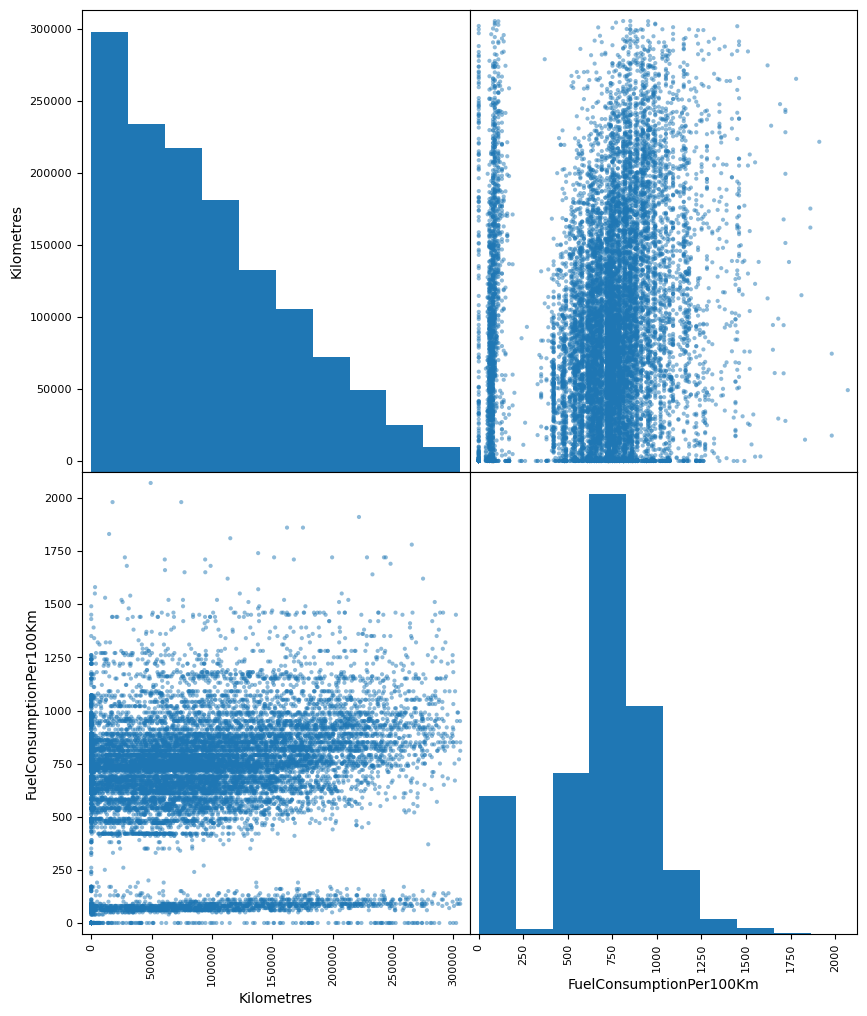

In [70]:
x_cols = ['Kilometres', 'FuelConsumptionPer100Km']
pd.plotting.scatter_matrix(df4[x_cols], figsize=(10,12));

# Checking QQ plot for  kilometres and FuelConsumptionPer100Km

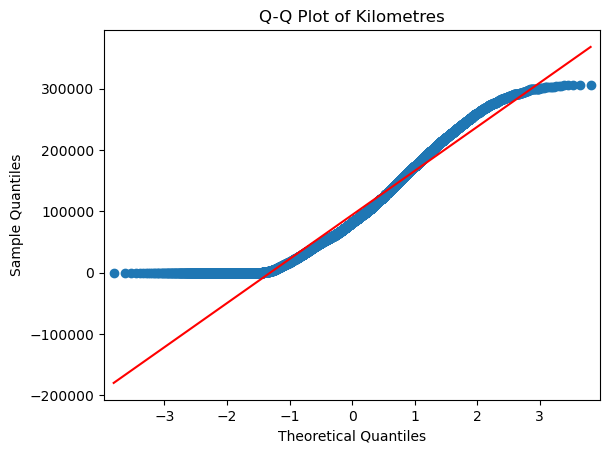

In [71]:
qqplot(df4['Kilometres'], line='s')
plt.title('Q-Q Plot of Kilometres')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

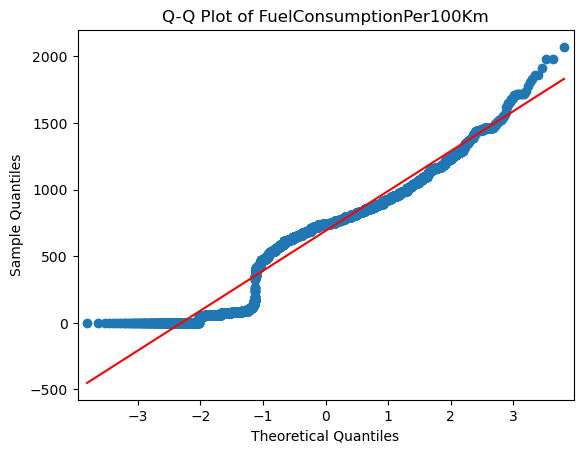

In [72]:
qqplot(df4['FuelConsumptionPer100Km'], line='s')
plt.title('Q-Q Plot of FuelConsumptionPer100Km')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# log transformation procedure 

In [73]:
#1-as these(kilometres,andfuelconsumptionper100KM) variables are not normal distributed we would do Log transformation for them but we need to investigate -inf or +inf or zero values 
#and remove them first 

In [74]:
df4['Kilometres'].describe()


count     14474.000000
mean      94115.715490
std       71885.735812
min           0.000000
25%       37053.000000
50%       81698.500000
75%      141118.500000
max      305785.000000
Name: Kilometres, dtype: float64

In [75]:
#as kilometres has inf and zero value(checked with inf_count = np.isinf(df4['Kilometres']).sum()
#or
#df4['Kilometres'].describe()
# we need to change them to NAN and then remove them
#df4['Kilometres'].replace([np.inf, -np.inf], np.nan, inplace=True)
#(zero value cause log trans to have inf outcome so we need to investigate for zero value)

In [76]:
df4.dropna(subset=['Kilometres'], inplace=True)

In [77]:
#now checking zero values and drop it
zero_count = (df4['Kilometres'] == 0).sum()
zero_count


454

In [78]:
df4 = df4[df4['Kilometres'] != 0]

In [79]:
df4['Kilometres'].describe()

count     14020.000000
mean      97163.399857
std       70984.251456
min           1.000000
25%       42268.750000
50%       84810.000000
75%      143951.750000
max      305785.000000
Name: Kilometres, dtype: float64

In [80]:
#there is no NAN or inf values for kilometres also our kilomtres anymore also column is clean from any inf values now we can do the log transformation

In [81]:
#now we are checking our second variable :'FuelConsumptionPer100Km',as we see there is zero  values
df4['FuelConsumptionPer100Km'].describe()

count    14020.000000
mean       696.495720
std        292.959039
min          1.000000
25%        611.000000
50%        741.000000
75%        851.000000
max       2071.000000
Name: FuelConsumptionPer100Km, dtype: float64

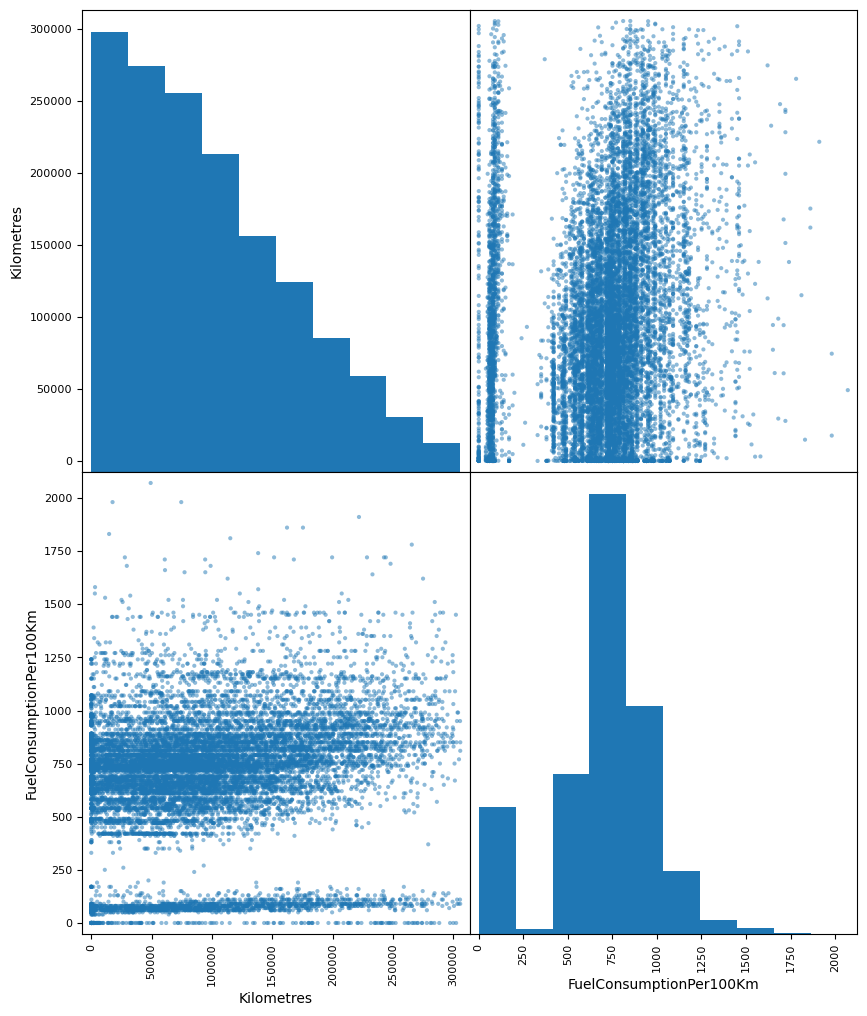

In [82]:
x_cols = ['Kilometres', 'FuelConsumptionPer100Km']
pd.plotting.scatter_matrix(df4[x_cols], figsize=(10,12));

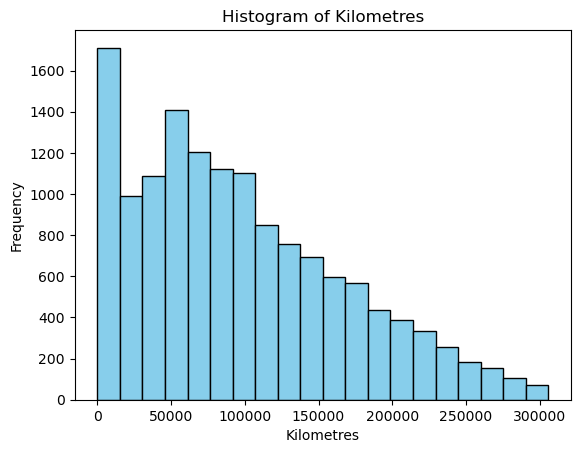

In [83]:
plt.hist(df4['Kilometres'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Kilometres')
plt.xlabel('Kilometres')
plt.ylabel('Frequency')
plt.show()

In [84]:
#by checkin below code we noticed there is no inf or zero value in this continious variable
#zero_count1 = (df4['FuelConsumptionPer100Km'] == 0).sum()
#zero_count1
#df4 = df4[df4['FuelConsumptionPer100Km'] != 0]

In [85]:
df4['Kilometres'].head()

0      5595
1        16
2      8472
3    136517
4      1035
Name: Kilometres, dtype: int32

# Doing Log transformation for cleaned continious variable now

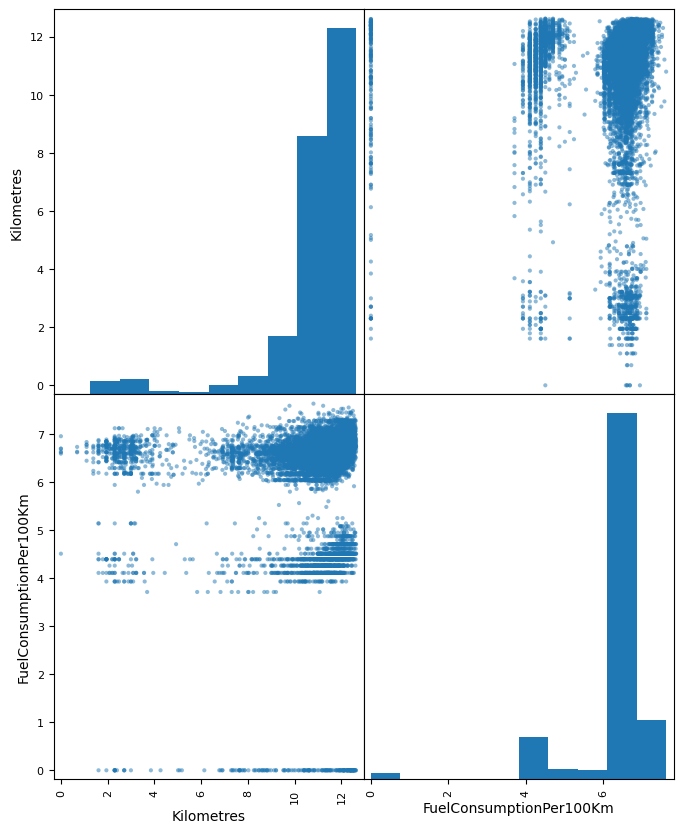

In [86]:
non_normal = ['Kilometres','FuelConsumptionPer100Km']
for feat in non_normal:
    df4[feat] = df4[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(df4[x_cols], figsize=(8,10));

In [87]:
df4['Kilometres'].head()

0     8.629629
1     2.772589
2     9.044522
3    11.824204
4     6.942157
Name: Kilometres, dtype: float64

# checking model after log transformation

In [88]:
df4.dropna(inplace=True)
X = sm.add_constant(df4.drop(columns=['Price']))
y = df4['Price']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     665.2
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:36:42   Log-Likelihood:            -1.6010e+05
No. Observations:               14020   AIC:                         3.202e+05
Df Residuals:                   14004   BIC:                         3.203e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1.519e+05   2143.627     70.855      0.000    1.48e+05    1.56e+05
FuelConsumptionPer100Km  -187.7833    191.148     -0.982      0.326    -562.459     186.892
Kilometres              -8094.5604    158.245    -51.152      0.000   -8404.743   -7784.378
UN_NEW                  -3.804e+04   1663.735    -22.866      0.000   -4.13e+04   -3.48e+04
UN_USED                   1.32e+04   1398.133      9.438      0.000    1.05e+04    1.59e+04
Tran_Manual             -7503.1623    617.758    -12.146      0.000   -8714.051   -6292.273
Drive_Front              -1.69e+04    433.665    -38.961      0.000   -1.77e+04    -1.6e+04
Drive_Rear              -9392.8834    625.952    -15.006      0.000   -1.06e+04   -8165.933
Fuel_Gas                 -2.77e+04   6216.459     -4.457      0.000   -3.99e+04   -1.55e+04
Fuel_Oil                -1.701e+04    929.679    -18.301      0.000   -1.88e+04   -1.52e+04
Cyl_M                   -6587.4969   1224.883     -5.378      0.000   -8988.431   -4186.562
Cyl_H                    4.231e+04   1569.091     26.964      0.000    3.92e+04    4.54e+04
Door_3                  -4719.0229   1836.017     -2.570      0.010   -8317.862   -1120.184
Door_4                  -6225.4623    851.428     -7.312      0.000   -7894.375   -4556.550
Door_5                  -9621.2520    993.494     -9.684      0.000   -1.16e+04   -7673.871
Seat_Medium             -3779.3454    499.714     -7.563      0.000   -4758.851   -2799.840
==============================================================================
Omnibus:                    18014.492   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7714070.246
Skew:                           6.802   Prob(JB):                         0.00
Kurtosis:                     117.106   Cond. No.                         429.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
df4.head()

,FuelConsumptionPer100Km,Kilometres,Price,UN_NEW,UN_USED,Tran_Manual,Drive_Front,Drive_Rear,Fuel_Gas,Fuel_Oil,Cyl_M,Cyl_H,Door_3,Door_4,Door_5,Seat_Medium
0,6.769642,8.629629,51990,0,0,0,0,0,0,1,1,0,0,1,0,0
1,6.508769,2.772589,19990,0,1,0,1,0,0,1,1,0,0,0,1,1
2,6.493754,9.044522,108988,0,1,0,0,1,0,1,1,0,0,0,0,1
3,4.709530,11.824204,32990,0,1,0,0,1,0,1,0,1,0,0,0,1
4,4.110874,6.942157,34990,0,1,0,1,0,0,1,1,0,0,1,0,1


In [90]:

df4['Kilometres'].describe()

count    14020.000000
mean        10.781083
std          2.059667
min          0.000000
25%         10.651803
50%         11.348169
75%         11.877233
max         12.630638
Name: Kilometres, dtype: float64

In [91]:
df4 = df4[df4['Kilometres'] != 0]
df4['Kilometres'].describe()

count    14013.000000
mean        10.786468
std          2.046033
min          0.693147
25%         10.653700
50%         11.349041
75%         11.877332
max         12.630638
Name: Kilometres, dtype: float64

In [92]:
df4 = df4[df4['FuelConsumptionPer100Km'] != 0]
df4['FuelConsumptionPer100Km'].describe()

count    13831.000000
mean         6.386774
std          0.743474
min          3.713572
25%          6.415097
50%          6.608001
75%          6.746412
max          7.635787
Name: FuelConsumptionPer100Km, dtype: float64

In [93]:
df4.dropna(inplace=True)
X = sm.add_constant(df4.drop(columns=['Price']))
y = df4['Price']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     664.0
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:36:42   Log-Likelihood:            -1.5756e+05
No. Observations:               13831   AIC:                         3.151e+05
Df Residuals:                   13815   BIC:                         3.153e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1.457e+05   2599.636     56.029      0.000    1.41e+05    1.51e+05
FuelConsumptionPer100Km   119.0213    250.077      0.476      0.634    -371.163     609.206
Kilometres              -8260.0275    156.976    -52.620      0.000   -8567.722   -7952.333
UN_NEW                  -3.748e+04   1647.980    -22.744      0.000   -4.07e+04   -3.43e+04
UN_USED                  1.488e+04   1389.872     10.706      0.000    1.22e+04    1.76e+04
Tran_Manual             -7438.1415    607.722    -12.239      0.000   -8629.360   -6246.923
Drive_Front              -1.63e+04    424.114    -38.437      0.000   -1.71e+04   -1.55e+04
Drive_Rear              -9048.0180    615.502    -14.700      0.000   -1.03e+04   -7841.550
Fuel_Gas                -2.647e+04   6050.682     -4.376      0.000   -3.83e+04   -1.46e+04
Fuel_Oil                -1.553e+04    938.772    -16.543      0.000   -1.74e+04   -1.37e+04
Cyl_M                   -3550.4333   1304.579     -2.722      0.007   -6107.586    -993.281
Cyl_H                     4.56e+04   1626.108     28.045      0.000    4.24e+04    4.88e+04
Door_3                  -5294.2011   1852.360     -2.858      0.004   -8925.078   -1663.324
Door_4                  -6332.5855    840.817     -7.531      0.000   -7980.700   -4684.471
Door_5                  -9486.4451    980.788     -9.672      0.000   -1.14e+04   -7563.968
Seat_Medium             -4047.3866    489.326     -8.271      0.000   -5006.532   -3088.241
==============================================================================
Omnibus:                    18326.921   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9438905.722
Skew:                           7.155   Prob(JB):                         0.00
Kurtosis:                     130.177   Cond. No.                         427.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
#since FuelConsumptionPer100Km is not significant we  would remove it
df4.drop('FuelConsumptionPer100Km',axis=1,inplace=True)

In [95]:
df4.dropna(inplace=True)
X = sm.add_constant(df4.drop(columns=['Price']))
y = df4['Price']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     711.5
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:36:42   Log-Likelihood:            -1.5756e+05
No. Observations:               13831   AIC:                         3.151e+05
Df Residuals:                   13816   BIC:                         3.153e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.463e+05   2172.151     67.368      0.000    1.42e+05    1.51e+05
Kilometres  -8257.7112    156.896    -52.632      0.000   -8565.249   -7950.173
UN_NEW      -3.747e+04   1647.805    -22.741      0.000   -4.07e+04   -3.42e+04
UN_USED      1.487e+04   1389.719     10.701      0.000    1.21e+04    1.76e+04
Tran_Manual -7429.1381    607.411    -12.231      0.000   -8619.746   -6238.531
Drive_Front  -1.63e+04    424.100    -38.437      0.000   -1.71e+04   -1.55e+04
Drive_Rear  -9048.2384    615.485    -14.701      0.000   -1.03e+04   -7841.804
Fuel_Gas    -2.636e+04   6045.295     -4.360      0.000   -3.82e+04   -1.45e+04
Fuel_Oil    -1.549e+04    934.103    -16.578      0.000   -1.73e+04   -1.37e+04
Cyl_M       -3529.5752   1303.806     -2.707      0.007   -6085.213    -973.938
Cyl_H        4.568e+04   1619.222     28.208      0.000    4.25e+04    4.88e+04
Door_3      -5317.9396   1851.637     -2.872      0.004   -8947.399   -1688.480
Door_4      -6337.1488    840.738     -7.538      0.000   -7985.110   -4689.187
Door_5      -9505.0091    979.985     -9.699      0.000   -1.14e+04   -7584.106
Seat_Medium -4042.6272    489.210     -8.264      0.000   -5001.546   -3083.709
==============================================================================
Omnibus:                    18331.679   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9447637.849
Skew:                           7.158   Prob(JB):                         0.00
Kurtosis:                     130.236   Cond. No.                         372.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking the 5 most important variable using RFE

In [96]:
predictors=df4.drop('Price',axis=1)
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=3)
selector = selector.fit(predictors, df4['Price'])

In [97]:
#Calling the .support_ attribute tells you which variables are selected
selector.support_ 

array([False, False,  True, False, False, False,  True, False, False,
        True, False, False, False, False])

In [98]:
#Calling .ranking_ shows the ranking of the features, selected features are assigned rank 1
selector.ranking_

array([ 5,  4,  1,  7,  3,  6,  1,  2, 12,  1, 10,  9,  8, 11])

In [99]:
X1 = df4.drop('Price', axis=1)
selected_columns = X1.columns[selector.support_ ]
linreg.fit(X1[selected_columns],y)

LinearRegression()

In [100]:
yhat = linreg.predict(X1[selected_columns])

In [101]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)
r_squared


0.184394943506886

In [102]:
adjusted_r_squared

0.18421798428438796

In [103]:
#since we dont have many independent variable here so we continuting our model evaluation with all the independent variables

# Data Evaluation

In [104]:
#x is our independent variable
X=df4.drop(['Price'],axis=1)

#y is our dependent variable
y=df4[['Price']]

#bacause we have dependent variable so we have y_test,y_train and independent variable we have x_train,x_test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [105]:
X_train.head()

,Kilometres,UN_NEW,UN_USED,Tran_Manual,Drive_Front,Drive_Rear,Fuel_Gas,Fuel_Oil,Cyl_M,Cyl_H,Door_3,Door_4,Door_5,Seat_Medium
4740,11.268941,0,1,0,1,0,0,1,1,0,0,1,0,1
16628,6.986566,0,0,0,1,0,0,1,1,0,0,1,0,1
13436,11.468378,0,1,0,1,0,0,1,1,0,0,0,1,1
5952,10.511812,0,1,0,1,0,0,1,1,0,0,0,1,1
6404,10.962406,0,1,0,1,0,0,1,1,0,0,0,1,1


In [106]:
X_train.columns

Index(['Kilometres', 'UN_NEW', 'UN_USED', 'Tran_Manual', 'Drive_Front',
       'Drive_Rear', 'Fuel_Gas', 'Fuel_Oil', 'Cyl_M', 'Cyl_H', 'Door_3',
       'Door_4', 'Door_5', 'Seat_Medium'],
      dtype='object')

In [107]:
y_test.head()

,Price
15965,12951
14369,27999
402,16880
6931,41485
15453,10990


In [108]:
df4.columns


Index(['Kilometres', 'Price', 'UN_NEW', 'UN_USED', 'Tran_Manual',
       'Drive_Front', 'Drive_Rear', 'Fuel_Gas', 'Fuel_Oil', 'Cyl_M', 'Cyl_H',
       'Door_3', 'Door_4', 'Door_5', 'Seat_Medium'],
      dtype='object')

# Building our model 

In [109]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

#create equation: 
linreg.fit(X_train, y_train) 

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [110]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [111]:
mse_train = np.sum((y_train - y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test - y_hat_test)**2)/len(y_test)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

Train Mean Squared Error: Price    4.426449e+08
dtype: float64
Test Mean Squared Error: Price    5.262192e+08
dtype: float64


In [112]:
#based on the difference betwenn MSE_train , MSE_test we could say it is not overfitting

# Using Cross validation method 

In [113]:
#using k_fold cross validation to havr R square
from sklearn.model_selection import cross_val_score

cross_val_score(linreg, X, y, cv=10)

array([0.44616754, 0.46575143, 0.3996473 , 0.34464288, 0.41888565,
       0.50309462, 0.32855933, 0.37781754, 0.46045812, 0.41190303])

In [114]:
from sklearn.metrics import make_scorer

cross_val_score(linreg, X, y, scoring=make_scorer(mean_squared_error))

array([3.43752046e+08, 7.66094853e+08, 3.32236756e+08, 4.76728246e+08,
       4.09488753e+08])

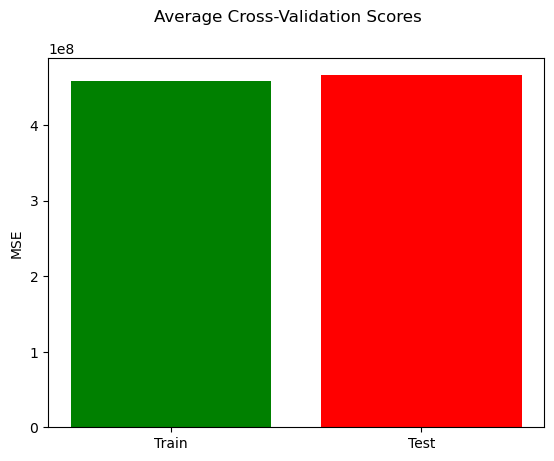

In [120]:
from sklearn.model_selection import cross_validate
cross_val_results = cross_validate(linreg, X, y, scoring="neg_mean_squared_error", return_train_score=True)
# Negative signs in front to convert back to MSE from -MSE
train_avg = -cross_val_results["train_score"].mean()
test_avg = -cross_val_results["test_score"].mean()
labels = ['Train', 'Test']
colors = ['green', 'red']
fig, ax = plt.subplots()
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("MSE")
fig.suptitle("Average Cross-Validation Scores");

In [ ]:
#as the cross validation show this model is not overfitting and we have quite close MSE for train and test 

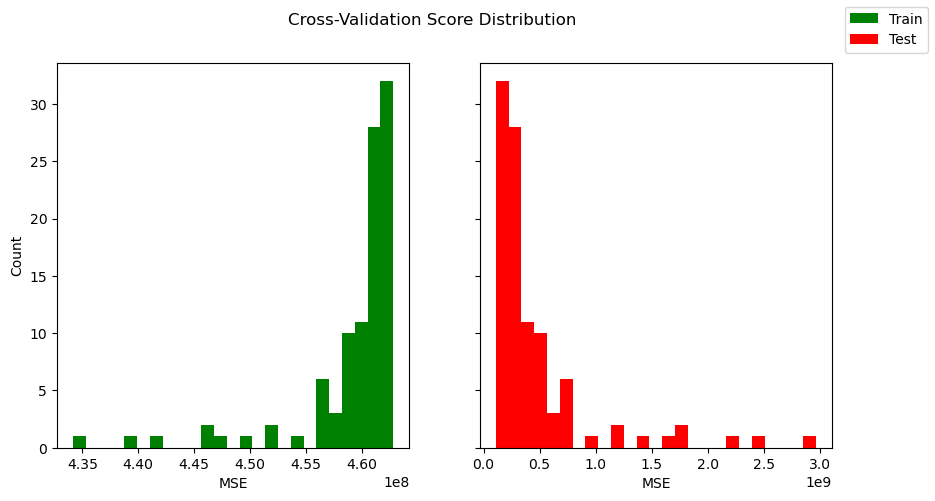

In [121]:
cross_val_results = cross_validate(linreg, X, y, cv=10, scoring="neg_mean_squared_error", return_train_score=True)
train_scores = -cross_val_results["train_score"]
test_scores = -cross_val_results["test_score"]

fig, (left, right) = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
bins=25
left.hist(train_scores, label=labels[0], bins=bins, color=colors[0])
left.set_ylabel("Count")
left.set_xlabel("MSE")
right.hist(test_scores, label=labels[1], bins=bins, color=colors[1])
right.set_xlabel("MSE")
fig.suptitle("Cross-Validation Score Distribution")
fig.legend();

## 